# Null Handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Number of zeros in each column
768-df.astype(bool).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [4]:
df.isnull().sum() #No nul

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Replacing all 0 values with Null values
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"] #Pregnancies & Outcome can be 0
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

In [6]:
df_nan=replace_zero(df)

In [7]:
df_nan.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
#Finding median
def median(frame,var):
    temp = frame[frame[var].notnull()]
    temp = frame[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [9]:
print(median(df_nan,'Glucose'))
print(median(df_nan,'BloodPressure'))
print(median(df_nan,'SkinThickness'))
print(median(df_nan,'Insulin'))
print(median(df_nan,'BMI'))
print(median(df_nan,'DiabetesPedigreeFunction'))
print(median(df_nan,'Age'))

   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
   Outcome   Age
0        0  27.0
1        1  36.0


In [10]:
# Replacing Null values with relevant median values
def replace_null(frame,var):
    median_df=median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [11]:
# Calling function for each variable
print(str(replace_null(df_nan,'Glucose'))+ ' nulls for Glucose')
print(str(replace_null(df_nan,'SkinThickness'))+ ' nulls for SkinThickness')
print(str(replace_null(df_nan,'Insulin'))+ ' nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' nulls for BMI')
print(str(replace_null(df_nan,'BloodPressure'))+ ' nulls for BloodPressure')

0 nulls for Glucose
0 nulls for SkinThickness
0 nulls for Insulin
0 nulls for BMI
0 nulls for BloodPressure


In [12]:
df_nan.isnull().sum()
# No null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Standardization

In [13]:
# Scaling the data for uniformity.
from sklearn.preprocessing import StandardScaler
def std_scalar(df):
    std_X=StandardScaler()
    x=pd.DataFrame(std_X.fit_transform(df.drop(["Outcome"],axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
    y=df["Outcome"]
    return x,y

In [14]:
X,Y=std_scalar(df_nan)

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [16]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,1.480297e-16,-3.978299e-16,8.095376e-18,-3.469447e-18,1.318390e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551447e+00,-3.999727e+00,-2.486187e+00,-1.434747e+00,-2.070186e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.202356e-01,-6.934382e-01,-4.603073e-01,-4.408430e-01,-7.176590e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.536274e-01,-3.218035e-02,-1.226607e-01,-4.408430e-01,-5.593870e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.100618e-01,6.290775e-01,3.275348e-01,3.116039e-01,6.057816e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539814e+00,4.100681e+00,7.868309e+00,7.909072e+00,5.041489e+00,5.883565e+00,4.063716e+00


In [17]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

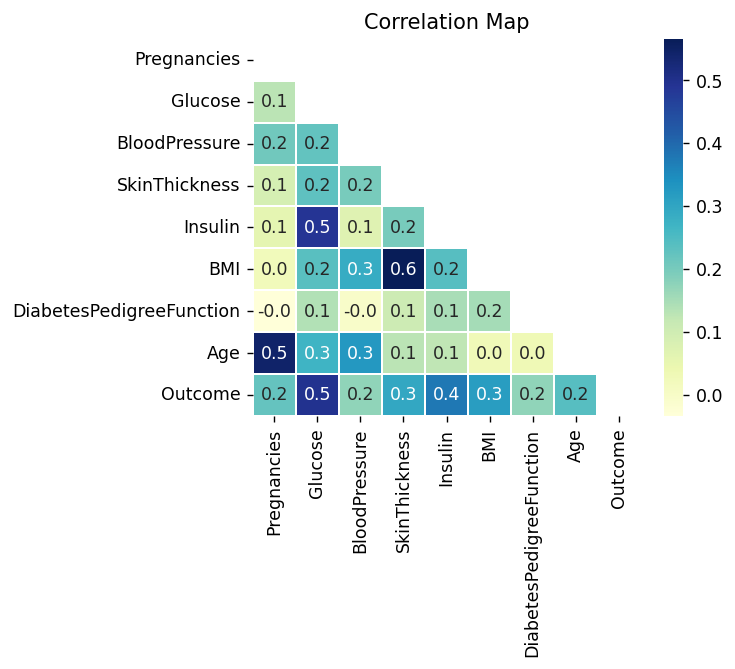

In [18]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()
# New Correlation map has higher correlated values

In [19]:
#Keeping train  size as 0.8
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

In [41]:
# We are good to go with baseline model
# Let's first implement KNN
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_scores.append(neigh.score(X_train,Y_train))
    test_scores.append(neigh.score(X_test,Y_test))

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

In [21]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 85.66775244299674 for k = 5


In [22]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=13 has generalized well for our data.

Max test_scores is 87.01298701298701 for k = 13


In [23]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=20, penalty='l2').fit(X_train, Y_train)
log_pred=log_model.predict(X_test)
log_model.score(X_test, Y_test)

0.8311688311688312

In [24]:
# Support Vector Machines
from sklearn import svm
svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, Y_test)
# Almost 89% Accuracy

0.8896103896103896

In [26]:
# Function to evaluate model performance
def model_perf(pred,Y_test):
    cmp_list=[]
    for i,j in zip(pred,Y_test):
        if (i==j):
            cmp_list.append(1)
        else:
            cmp_list.append(0)
    return cmp_list

In [27]:
cmp_list=model_perf(svm_pred,Y_test)

In [28]:
print('Model Accuracy Confirmation :'+ str(cmp_list.count(1)/len(Y_test)))

Model Accuracy Confirmation :0.8896103896103896


In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)
# Almost 86% Accuracy

0.8571428571428571

In [30]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()

In [31]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 1000
neural_pred = neural_model.fit(X_train, Y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/1000
18/18 - 3s - loss: 0.6087 - accuracy: 0.6431 - val_loss: 0.4246 - val_accuracy: 0.7419
Epoch 2/1000
18/18 - 0s - loss: 0.5328 - accuracy: 0.6413 - val_loss: 0.3802 - val_accuracy: 0.7419
Epoch 3/1000
18/18 - 0s - loss: 0.4984 - accuracy: 0.7083 - val_loss: 0.3689 - val_accuracy: 0.8226
Epoch 4/1000
18/18 - 0s - loss: 0.4760 - accuracy: 0.7645 - val_loss: 0.3714 - val_accuracy: 0.7742
Epoch 5/1000
18/18 - 0s - loss: 0.4573 - accuracy: 0.7899 - val_loss: 0.3685 - val_accuracy: 0.7903
Epoch 6/1000
18/18 - 0s - loss: 0.4377 - accuracy: 0.8043 - val_loss: 0.3334 - val_accuracy: 0.8387
Epoch 7/1000
18/18 - 0s - loss: 0.4193 - accuracy: 0.8134 - val_loss: 0.3205 - val_accuracy: 0.8387
Epoch 8/1000
18/18 - 0s - loss: 0.4028 - accuracy: 0.8351 - val_loss: 0.3091 - val_accuracy: 0.8548
Epoch 9/1000
18/18 - 0s - loss: 0.3899 - accuracy: 0.8406 - val_loss: 0.2883 - val_accuracy: 0.8871
Epoch 10/1000
18/18 - 0s - loss: 0.3778 - accuracy: 0.8569 - val_loss: 0.2795 - val_accuracy: 0.8871

Epoch 83/1000
18/18 - 0s - loss: 0.2268 - accuracy: 0.9022 - val_loss: 0.2149 - val_accuracy: 0.9032
Epoch 84/1000
18/18 - 0s - loss: 0.2148 - accuracy: 0.9167 - val_loss: 0.2272 - val_accuracy: 0.8871
Epoch 85/1000
18/18 - 0s - loss: 0.2107 - accuracy: 0.9221 - val_loss: 0.2161 - val_accuracy: 0.9032
Epoch 86/1000
18/18 - 0s - loss: 0.2165 - accuracy: 0.9167 - val_loss: 0.2313 - val_accuracy: 0.8871
Epoch 87/1000
18/18 - 0s - loss: 0.2833 - accuracy: 0.8841 - val_loss: 0.2312 - val_accuracy: 0.8871
Epoch 88/1000
18/18 - 0s - loss: 0.2413 - accuracy: 0.9058 - val_loss: 0.2262 - val_accuracy: 0.9032
Epoch 89/1000
18/18 - 0s - loss: 0.2204 - accuracy: 0.9076 - val_loss: 0.2228 - val_accuracy: 0.9032
Epoch 90/1000
18/18 - 0s - loss: 0.2210 - accuracy: 0.9040 - val_loss: 0.2302 - val_accuracy: 0.8871
Epoch 91/1000
18/18 - 0s - loss: 0.2177 - accuracy: 0.9221 - val_loss: 0.2251 - val_accuracy: 0.8871
Epoch 92/1000
18/18 - 0s - loss: 0.2302 - accuracy: 0.9130 - val_loss: 0.2793 - val_accurac

Epoch 164/1000
18/18 - 0s - loss: 0.1754 - accuracy: 0.9312 - val_loss: 0.2785 - val_accuracy: 0.9194
Epoch 165/1000
18/18 - 0s - loss: 0.1693 - accuracy: 0.9330 - val_loss: 0.3707 - val_accuracy: 0.8871
Epoch 166/1000
18/18 - 0s - loss: 0.1801 - accuracy: 0.9293 - val_loss: 0.3060 - val_accuracy: 0.9032
Epoch 167/1000
18/18 - 0s - loss: 0.1632 - accuracy: 0.9293 - val_loss: 0.3820 - val_accuracy: 0.9032
Epoch 168/1000
18/18 - 0s - loss: 0.1561 - accuracy: 0.9384 - val_loss: 0.4032 - val_accuracy: 0.9032
Epoch 169/1000
18/18 - 0s - loss: 0.1666 - accuracy: 0.9312 - val_loss: 0.4041 - val_accuracy: 0.9032
Epoch 170/1000
18/18 - 0s - loss: 0.1533 - accuracy: 0.9384 - val_loss: 0.4376 - val_accuracy: 0.9032
Epoch 171/1000
18/18 - 0s - loss: 0.1474 - accuracy: 0.9366 - val_loss: 0.4358 - val_accuracy: 0.9032
Epoch 172/1000
18/18 - 0s - loss: 0.1785 - accuracy: 0.9366 - val_loss: 0.4467 - val_accuracy: 0.8871
Epoch 173/1000
18/18 - 0s - loss: 0.2143 - accuracy: 0.9167 - val_loss: 0.4403 - v

Epoch 245/1000
18/18 - 0s - loss: 0.1962 - accuracy: 0.9257 - val_loss: 0.7444 - val_accuracy: 0.9032
Epoch 246/1000
18/18 - 0s - loss: 0.1802 - accuracy: 0.9293 - val_loss: 0.7870 - val_accuracy: 0.8871
Epoch 247/1000
18/18 - 0s - loss: 0.1595 - accuracy: 0.9348 - val_loss: 0.8194 - val_accuracy: 0.9032
Epoch 248/1000
18/18 - 0s - loss: 0.1681 - accuracy: 0.9330 - val_loss: 0.5410 - val_accuracy: 0.8871
Epoch 249/1000
18/18 - 0s - loss: 0.2524 - accuracy: 0.9094 - val_loss: 0.6293 - val_accuracy: 0.8548
Epoch 250/1000
18/18 - 0s - loss: 0.2092 - accuracy: 0.9112 - val_loss: 0.7577 - val_accuracy: 0.9032
Epoch 251/1000
18/18 - 0s - loss: 0.1751 - accuracy: 0.9348 - val_loss: 0.7258 - val_accuracy: 0.8871
Epoch 252/1000
18/18 - 0s - loss: 0.1475 - accuracy: 0.9348 - val_loss: 0.7538 - val_accuracy: 0.9032
Epoch 253/1000
18/18 - 0s - loss: 0.1410 - accuracy: 0.9420 - val_loss: 0.7272 - val_accuracy: 0.8871
Epoch 254/1000
18/18 - 0s - loss: 0.1371 - accuracy: 0.9529 - val_loss: 0.7362 - v

Epoch 326/1000
18/18 - 0s - loss: 0.1337 - accuracy: 0.9457 - val_loss: 0.4752 - val_accuracy: 0.9032
Epoch 327/1000
18/18 - 0s - loss: 0.1297 - accuracy: 0.9457 - val_loss: 0.6354 - val_accuracy: 0.8871
Epoch 328/1000
18/18 - 0s - loss: 0.1923 - accuracy: 0.9221 - val_loss: 0.5881 - val_accuracy: 0.8871
Epoch 329/1000
18/18 - 0s - loss: 0.1475 - accuracy: 0.9457 - val_loss: 0.5969 - val_accuracy: 0.8871
Epoch 330/1000
18/18 - 0s - loss: 0.1562 - accuracy: 0.9312 - val_loss: 0.6397 - val_accuracy: 0.9032
Epoch 331/1000
18/18 - 0s - loss: 0.1590 - accuracy: 0.9384 - val_loss: 0.6004 - val_accuracy: 0.9194
Epoch 332/1000
18/18 - 0s - loss: 0.1343 - accuracy: 0.9493 - val_loss: 0.6962 - val_accuracy: 0.9032
Epoch 333/1000
18/18 - 0s - loss: 0.1297 - accuracy: 0.9493 - val_loss: 0.7228 - val_accuracy: 0.9032
Epoch 334/1000
18/18 - 0s - loss: 0.1229 - accuracy: 0.9565 - val_loss: 0.7026 - val_accuracy: 0.9032
Epoch 335/1000
18/18 - 0s - loss: 0.1215 - accuracy: 0.9529 - val_loss: 0.6737 - v

Epoch 407/1000
18/18 - 0s - loss: 0.1512 - accuracy: 0.9438 - val_loss: 0.6029 - val_accuracy: 0.9194
Epoch 408/1000
18/18 - 0s - loss: 0.1506 - accuracy: 0.9348 - val_loss: 0.7308 - val_accuracy: 0.9194
Epoch 409/1000
18/18 - 0s - loss: 0.1491 - accuracy: 0.9348 - val_loss: 0.8189 - val_accuracy: 0.8871
Epoch 410/1000
18/18 - 0s - loss: 0.1464 - accuracy: 0.9438 - val_loss: 0.7109 - val_accuracy: 0.8871
Epoch 411/1000
18/18 - 0s - loss: 0.1671 - accuracy: 0.9420 - val_loss: 0.8377 - val_accuracy: 0.8710
Epoch 412/1000
18/18 - 0s - loss: 0.1682 - accuracy: 0.9420 - val_loss: 0.8611 - val_accuracy: 0.8871
Epoch 413/1000
18/18 - 0s - loss: 0.1403 - accuracy: 0.9493 - val_loss: 0.8193 - val_accuracy: 0.8871
Epoch 414/1000
18/18 - 0s - loss: 0.1350 - accuracy: 0.9529 - val_loss: 0.8205 - val_accuracy: 0.8871
Epoch 415/1000
18/18 - 0s - loss: 0.1318 - accuracy: 0.9529 - val_loss: 0.8426 - val_accuracy: 0.8710
Epoch 416/1000
18/18 - 0s - loss: 0.1317 - accuracy: 0.9547 - val_loss: 0.8519 - v

Epoch 488/1000
18/18 - 0s - loss: 0.1490 - accuracy: 0.9457 - val_loss: 0.5277 - val_accuracy: 0.8871
Epoch 489/1000
18/18 - 0s - loss: 0.1508 - accuracy: 0.9457 - val_loss: 0.5284 - val_accuracy: 0.9032
Epoch 490/1000
18/18 - 0s - loss: 0.1442 - accuracy: 0.9511 - val_loss: 0.5258 - val_accuracy: 0.9032
Epoch 491/1000
18/18 - 0s - loss: 0.1465 - accuracy: 0.9493 - val_loss: 0.5009 - val_accuracy: 0.9032
Epoch 492/1000
18/18 - 0s - loss: 0.1444 - accuracy: 0.9511 - val_loss: 0.5355 - val_accuracy: 0.9032
Epoch 493/1000
18/18 - 0s - loss: 0.1432 - accuracy: 0.9529 - val_loss: 0.5011 - val_accuracy: 0.9032
Epoch 494/1000
18/18 - 0s - loss: 0.1366 - accuracy: 0.9493 - val_loss: 0.6290 - val_accuracy: 0.9032
Epoch 495/1000
18/18 - 0s - loss: 0.1499 - accuracy: 0.9511 - val_loss: 0.5568 - val_accuracy: 0.8871
Epoch 496/1000
18/18 - 0s - loss: 0.1496 - accuracy: 0.9493 - val_loss: 0.5646 - val_accuracy: 0.8871
Epoch 497/1000
18/18 - 0s - loss: 0.1365 - accuracy: 0.9529 - val_loss: 0.5951 - v

Epoch 569/1000
18/18 - 0s - loss: 0.1749 - accuracy: 0.9312 - val_loss: 0.6812 - val_accuracy: 0.8871
Epoch 570/1000
18/18 - 0s - loss: 0.1530 - accuracy: 0.9438 - val_loss: 0.5954 - val_accuracy: 0.8710
Epoch 571/1000
18/18 - 0s - loss: 0.1328 - accuracy: 0.9547 - val_loss: 0.6128 - val_accuracy: 0.8871
Epoch 572/1000
18/18 - 0s - loss: 0.1378 - accuracy: 0.9529 - val_loss: 0.6085 - val_accuracy: 0.8871
Epoch 573/1000
18/18 - 0s - loss: 0.1316 - accuracy: 0.9601 - val_loss: 0.5782 - val_accuracy: 0.8871
Epoch 574/1000
18/18 - 0s - loss: 0.1331 - accuracy: 0.9529 - val_loss: 0.5890 - val_accuracy: 0.8871
Epoch 575/1000
18/18 - 0s - loss: 0.1374 - accuracy: 0.9583 - val_loss: 0.5724 - val_accuracy: 0.9032
Epoch 576/1000
18/18 - 0s - loss: 0.1363 - accuracy: 0.9547 - val_loss: 0.7092 - val_accuracy: 0.8710
Epoch 577/1000
18/18 - 0s - loss: 0.1400 - accuracy: 0.9529 - val_loss: 0.6045 - val_accuracy: 0.9032
Epoch 578/1000
18/18 - 0s - loss: 0.1394 - accuracy: 0.9529 - val_loss: 0.6206 - v

Epoch 650/1000
18/18 - 0s - loss: 0.1468 - accuracy: 0.9511 - val_loss: 0.5107 - val_accuracy: 0.9032
Epoch 651/1000
18/18 - 0s - loss: 0.1470 - accuracy: 0.9493 - val_loss: 0.5091 - val_accuracy: 0.9032
Epoch 652/1000
18/18 - 0s - loss: 0.1480 - accuracy: 0.9438 - val_loss: 0.5071 - val_accuracy: 0.9194
Epoch 653/1000
18/18 - 0s - loss: 0.1456 - accuracy: 0.9475 - val_loss: 0.5256 - val_accuracy: 0.9032
Epoch 654/1000
18/18 - 0s - loss: 0.1480 - accuracy: 0.9475 - val_loss: 0.5234 - val_accuracy: 0.9032
Epoch 655/1000
18/18 - 0s - loss: 0.1451 - accuracy: 0.9493 - val_loss: 0.5309 - val_accuracy: 0.9032
Epoch 656/1000
18/18 - 0s - loss: 0.1443 - accuracy: 0.9475 - val_loss: 0.5323 - val_accuracy: 0.9032
Epoch 657/1000
18/18 - 0s - loss: 0.1490 - accuracy: 0.9438 - val_loss: 0.4931 - val_accuracy: 0.9194
Epoch 658/1000
18/18 - 0s - loss: 0.1505 - accuracy: 0.9475 - val_loss: 0.5084 - val_accuracy: 0.9032
Epoch 659/1000
18/18 - 0s - loss: 0.1549 - accuracy: 0.9438 - val_loss: 0.5190 - v

Epoch 731/1000
18/18 - 0s - loss: 0.1719 - accuracy: 0.9348 - val_loss: 0.7619 - val_accuracy: 0.8710
Epoch 732/1000
18/18 - 0s - loss: 0.1655 - accuracy: 0.9384 - val_loss: 0.5685 - val_accuracy: 0.8710
Epoch 733/1000
18/18 - 0s - loss: 0.2417 - accuracy: 0.9130 - val_loss: 0.7002 - val_accuracy: 0.8710
Epoch 734/1000
18/18 - 0s - loss: 0.3090 - accuracy: 0.8859 - val_loss: 0.4989 - val_accuracy: 0.8548
Epoch 735/1000
18/18 - 0s - loss: 0.2637 - accuracy: 0.9022 - val_loss: 0.4888 - val_accuracy: 0.8710
Epoch 736/1000
18/18 - 0s - loss: 0.2085 - accuracy: 0.9167 - val_loss: 0.6436 - val_accuracy: 0.8871
Epoch 737/1000
18/18 - 0s - loss: 0.2089 - accuracy: 0.9312 - val_loss: 0.4775 - val_accuracy: 0.8226
Epoch 738/1000
18/18 - 0s - loss: 0.2002 - accuracy: 0.9185 - val_loss: 0.4723 - val_accuracy: 0.8548
Epoch 739/1000
18/18 - 0s - loss: 0.1838 - accuracy: 0.9312 - val_loss: 0.4094 - val_accuracy: 0.9032
Epoch 740/1000
18/18 - 0s - loss: 0.1739 - accuracy: 0.9330 - val_loss: 0.4164 - v

Epoch 812/1000
18/18 - 0s - loss: 0.1482 - accuracy: 0.9529 - val_loss: 0.6564 - val_accuracy: 0.8710
Epoch 813/1000
18/18 - 0s - loss: 0.1465 - accuracy: 0.9475 - val_loss: 0.6676 - val_accuracy: 0.8387
Epoch 814/1000
18/18 - 0s - loss: 0.1436 - accuracy: 0.9511 - val_loss: 0.6982 - val_accuracy: 0.8548
Epoch 815/1000
18/18 - 0s - loss: 0.1517 - accuracy: 0.9493 - val_loss: 0.6738 - val_accuracy: 0.8387
Epoch 816/1000
18/18 - 0s - loss: 0.1485 - accuracy: 0.9547 - val_loss: 0.7729 - val_accuracy: 0.8548
Epoch 817/1000
18/18 - 0s - loss: 0.1458 - accuracy: 0.9529 - val_loss: 0.7363 - val_accuracy: 0.8710
Epoch 818/1000
18/18 - 0s - loss: 0.1408 - accuracy: 0.9511 - val_loss: 0.7127 - val_accuracy: 0.8548
Epoch 819/1000
18/18 - 0s - loss: 0.1501 - accuracy: 0.9511 - val_loss: 0.6748 - val_accuracy: 0.8548
Epoch 820/1000
18/18 - 0s - loss: 0.1506 - accuracy: 0.9547 - val_loss: 0.5818 - val_accuracy: 0.8548
Epoch 821/1000
18/18 - 0s - loss: 0.1472 - accuracy: 0.9511 - val_loss: 0.6133 - v

Epoch 893/1000
18/18 - 0s - loss: 0.1529 - accuracy: 0.9529 - val_loss: 0.6229 - val_accuracy: 0.8065
Epoch 894/1000
18/18 - 0s - loss: 0.1519 - accuracy: 0.9529 - val_loss: 0.6183 - val_accuracy: 0.8226
Epoch 895/1000
18/18 - 0s - loss: 0.1536 - accuracy: 0.9493 - val_loss: 0.5341 - val_accuracy: 0.8387
Epoch 896/1000
18/18 - 0s - loss: 0.1508 - accuracy: 0.9511 - val_loss: 0.5838 - val_accuracy: 0.8548
Epoch 897/1000
18/18 - 0s - loss: 0.1489 - accuracy: 0.9529 - val_loss: 0.5370 - val_accuracy: 0.8387
Epoch 898/1000
18/18 - 0s - loss: 0.1501 - accuracy: 0.9529 - val_loss: 0.6400 - val_accuracy: 0.8548
Epoch 899/1000
18/18 - 0s - loss: 0.1518 - accuracy: 0.9475 - val_loss: 0.5556 - val_accuracy: 0.8548
Epoch 900/1000
18/18 - 0s - loss: 0.1468 - accuracy: 0.9511 - val_loss: 0.5358 - val_accuracy: 0.8710
Epoch 901/1000
18/18 - 0s - loss: 0.1502 - accuracy: 0.9493 - val_loss: 0.6099 - val_accuracy: 0.8548
Epoch 902/1000
18/18 - 0s - loss: 0.1482 - accuracy: 0.9511 - val_loss: 0.5319 - v

Epoch 974/1000
18/18 - 0s - loss: 0.1614 - accuracy: 0.9493 - val_loss: 0.5479 - val_accuracy: 0.8387
Epoch 975/1000
18/18 - 0s - loss: 0.1794 - accuracy: 0.9438 - val_loss: 0.6130 - val_accuracy: 0.8387
Epoch 976/1000
18/18 - 0s - loss: 0.1768 - accuracy: 0.9438 - val_loss: 0.4673 - val_accuracy: 0.8548
Epoch 977/1000
18/18 - 0s - loss: 0.1495 - accuracy: 0.9511 - val_loss: 0.4652 - val_accuracy: 0.8710
Epoch 978/1000
18/18 - 0s - loss: 0.1451 - accuracy: 0.9547 - val_loss: 0.4557 - val_accuracy: 0.8710
Epoch 979/1000
18/18 - 0s - loss: 0.1428 - accuracy: 0.9565 - val_loss: 0.4790 - val_accuracy: 0.8387
Epoch 980/1000
18/18 - 0s - loss: 0.1484 - accuracy: 0.9475 - val_loss: 0.4397 - val_accuracy: 0.8387
Epoch 981/1000
18/18 - 0s - loss: 0.1441 - accuracy: 0.9529 - val_loss: 0.5328 - val_accuracy: 0.8548
Epoch 982/1000
18/18 - 0s - loss: 0.1452 - accuracy: 0.9511 - val_loss: 0.5565 - val_accuracy: 0.8548
Epoch 983/1000
18/18 - 0s - loss: 0.1492 - accuracy: 0.9529 - val_loss: 0.5557 - v

In [33]:
# Let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()
# 91% accuracy on train

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.153367,0.945652,0.814869,0.838710,995
996,0.144571,0.952899,0.569301,0.838710,996
997,0.142952,0.951087,0.632056,0.838710,997
998,0.138824,0.952899,0.592193,0.838710,998
999,0.137464,0.954710,0.587171,0.854839,999


In [34]:
neural_test=neural_model.predict(X_test)

In [35]:
neural_test_converted=[]
for i in neural_test:
    if i>0.5:
        neural_test_converted.append(1)
    else:
        neural_test_converted.append(0)

In [36]:
cmp_list=model_perf(neural_test_converted,Y_test)

In [39]:
print('Test Accuracy :' + str(cmp_list.count(1)/len(Y_test)*100)+' %')
#85% Accuracy.

Test Accuracy :85.06493506493507 %


In [40]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))